In [3]:
import pandas as pd

In [4]:
results_df = pd.read_excel("Testing/OutcomesGreedy/WorkingExcel.xlsx")
results_df.columns

Index(['Unnamed: 0', 'Profits', 'Weights', 'Max_Weight', 'Problem type',
       'Solving type', 'Init type', 'Quantum Solution',
       'Classical Greedy Solution', 'Classical Optimal Solution',
       'Quantum Runtime', 'Classical Greedy Runtime',
       'Classical Optimal Runtime', 'Timestamp'],
      dtype='object')

In [5]:
results = results_df.groupby("Problem type").apply(lambda df: [(df["Quantum Solution"] / df["Classical Optimal Solution"]).mean(), (df["Classical Greedy Solution"] / df["Classical Optimal Solution"]).mean()])

In [ ]:
plot_results_df = results

In [12]:
def len_count(string):
    return len(string.replace("[", "").replace("]", "").split(","))

<AxesSubplot:xlabel='Number Qubits'>

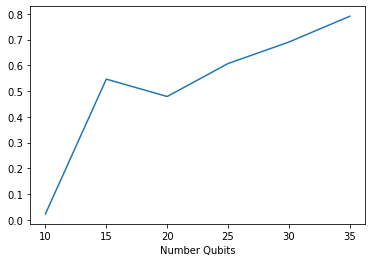

In [41]:
runtimes = results_df[['Quantum Runtime', 'Classical Greedy Runtime','Classical Optimal Runtime', "Number Qubits"]].groupby("Number Qubits").apply(lambda df: df.apply(lambda col: col / col.max()))
results_df.groupby("Number Qubits")["Quantum Runtime"].apply(lambda x: x.mean() / results_df["Quantum Runtime"].max()).plot()


<AxesSubplot:xlabel='Number Qubits'>

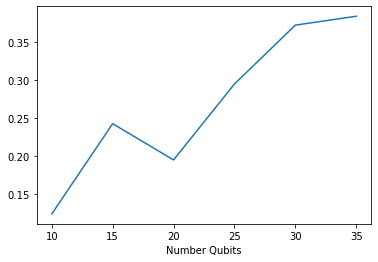

In [40]:
results_df.groupby("Number Qubits")["Classical Greedy Runtime"].apply(lambda x: x.mean() / results_df["Classical Greedy Runtime"].max()).plot()


<AxesSubplot:xlabel='Number Qubits'>

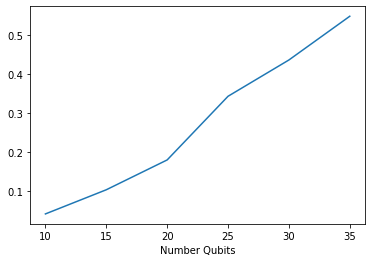

In [39]:
results_df.groupby("Number Qubits")["Classical Optimal Runtime"].apply(lambda x: x.mean() / results_df["Classical Optimal Runtime"].max()).plot()


In [11]:
results.apply(lambda x: x[0])

Problem type
alm_str       0.987313
inv_str       0.983997
strong_cor    0.989413
subset        0.999248
uncor         0.931200
weak_cor      0.979670
dtype: float64

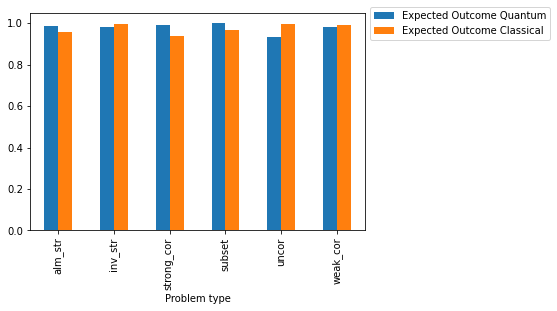

In [21]:
plot_df = pd.DataFrame([results.apply(lambda x: x[0]), results.apply(lambda x: x[1])]).transpose()
plot_df.columns = "Expected Outcome Quantum", "Expected Outcome Classical"
plt = plot_df.plot(kind="bar")
plt.legend(bbox_to_anchor=(1.0, 1.05))

In [32]:
plot_df_new = plot_df.transpose()
plot_df_new.columns = ["Almost Strong Correlated", "Inverse Strong Correlated", "Strong Correlated", "Subset Sum", "Uncorrelated", "Weakly Correlated"]

In [36]:
plot_df_v2 = plot_df_new[["Strong Correlated", "Almost Strong Correlated", "Weakly Correlated"]].transpose()

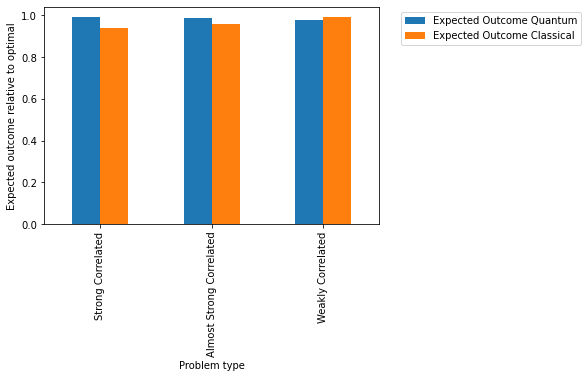

In [39]:
plt = plot_df_v2.plot(kind="bar")
plt.set_ylabel("Expected outcome relative to optimal")
plt.set_xlabel("Problem instance type")
plt.legend(bbox_to_anchor=(1.05, 1.0))